To begin, I'm importing the required libraries (NumPy, Pandas) and a few extra (time [for measuring runtime] and math [for operations like log and ceiling]). I will label the problems as "3a, 3b, 3c" for the Matrix Multiplication problem. The Matrix-Chain Multiplication Problem will be labeled by steps (i.e. 'step 1', 'step 2', so forth). 



In [1]:
import numpy as np
import pandas as pd
import math
import time

## Below are the implementations of Algorithm-1 through Algorithm-5

**Algorithm-1(A,B,C,p,q,r)**

* Objective: Simple matrix multiplication
* Input: Matrix A, which has dimensions of p x q and matrix B, which has dimensions of q x r. Additionally, I pass matrix C to algorithm as an array of zeros with dimensions p x r.
* Output: A matrix, C, which is the result of matrix multiplication between A and B.

- For all algorithms which take in values of C, p, q, and r: I could have only passed A and B and defined C,p,q, and r within each algorithm, but instead I chose to pass all of them because the instructions specify to implement the algorithms consistent with the how they appear in the file.-
- Additionally, I was conflicted on whether to implement algorithm_1 as it appears below or using the NumPy library (in which case it would appear as simply, 'np.dot(A,B)' and would be faster). The instructions specified following the algorithms given, but also to utilize the library for matrix operations *shrug*.

In [2]:
def algorithm_1(A,B,C,p,q,r):
    for i in range(p):
        for j in range(r):
            sum = 0
            for k in range(q):
                sum += (A[i][k] * B[k][j])
            C[i][j] = sum 
    return C

**Algorithm-2(A,B,C,p,q,r,T)**

* Objective: Matrix multiplication using step-size, in turn computing matrices in smaller pieces which optimizes performance.
* Input: Matrix A, which has dimensions of p x q and matrix B, which has dimensions of q x r. Additionally, I pass matrix C to algorithm as an array of zeros and a variable, T, representing step size.
* Output: A matrix, C, which is the result of matrix multiplication between A and B.

In [3]:
def algorithm_2(A,B,C,p,q,r,T):
   
    for I in range(0,p,T):
        for J in range(0,r,T):
                for K in range(0,q,T):
                    for i in range(I, min(I+T, p)):
                        for j in range(J, min(J+T, r)):
                            sum = 0
                            for k in range(K, min(K+T, q)):
                                sum += A[i][k] * B[k][j]
                            C[i][j] = sum
    return C

**Algorithm_3(A,B,C,p,q,r)**
* Objective: Matrix multiplication by recursive splitting into two submatrices. The threshold, 32, was chosen somewhat arbitrarily. It was given as 8 in the assignment outline, but multiple runs proved that a higher thresold is more efficient.
* Input: Matrix A, which has dimensions of p x q and matrix B, which has dimensions of q x r. Additionally, I pass matrix C to algorithm as an array of zeros.
* Output: A matrix, C, which is the result of matrix multiplication between A and B.

In [4]:
def algorithm_3(A,B,C,p,q,r):
    x = max(p,q,r)
    if x < 32:
        return algorithm_1(A,B,C,p,q,r)
    else:   
        if x == p:
            middle = p // 2
            A1 = A[:middle, :]
            A2 = A[middle:, :]
            C1 = C[:middle,:]
            C2 = C[middle:,:]
            C = np.vstack((algorithm_3(A1,B,C1,middle,q,r),algorithm_3(A2,B,C2,p - middle,q,r)))
            return C  
            
        elif x == r:
            middle = r // 2
            B1 = B[:, :middle]
            B2 = B[:, middle:]
            C1 = C[:, :middle]
            C2 = C[:, middle:]
            C = np.hstack((algorithm_3(A,B1,C,p,q,middle),algorithm_3(A,B2,C,p,q,r- middle)))
            return C
            
        else:
            middle = q // 2
            A1 = A[:, :middle]
            A2 = A[:, middle:]
            B1 = B[:middle, :]
            B2 = B[middle:, :]

            C = np.add(algorithm_3(A1,B1,C,p,middle,r),algorithm_3(A2,B1,C,p,middle,r))
            return C
    


**Algorithms_4(A,B)**
* Objective: Recusively split a matrix into four sub-matrices to compute matrix multiplication. 
* Input: Takes in matrices A and B, of size p x q and q x r. Additionally, p,q, and r must be a power of 2 (i.e. p = 2^n, etc for n >=0
* Output: Matrix C, which has dimensions of p x r and is the result of matrix multiplication of A and B.


In [5]:
def power2(n):
    return n > 0 and (n & (n-1)) == 0  # Ensure valid input by checking that n is non-negative and
                                       # also a power of 2
def algorithm_4(A,B):
    p,q = A.shape
    q1,r = B.shape
    assert p == q == q1 == r
    assert power2(q)
    
    if q <= 64:
        return np.dot(A,B)
    else:                                      # Split each matrix into 4
        middle = q // 2
        A11 = A[:middle, :middle]
        A21 = A[middle:, :middle]
        A12 = A[:middle, middle:]
        A22 = A[middle:, middle:]
        B11 = B[:middle, :middle]
        B21 = B[middle:, :middle]
        B12 = B[:middle, middle:]
        B22 = B[middle:, middle:]

        # Calculate indivdiual entries in C
        C11 = np.add(algorithm_4(A11,B11),algorithm_4(A12,B21))                
        C21 = np.add(algorithm_4(A21,B11),algorithm_4(A22,B21))
        C12 = np.add(algorithm_4(A11,B12),algorithm_4(A12,B22))
        C22 = np.add(algorithm_4(A21,B12),algorithm_4(A22,B22))


        C = np.vstack((np.hstack((C11,C12)),np.hstack((C21,C22))))
        return C     

**Algorithm-5(A,B)**
* Objective: Recusively split a matrix into four sub-matrices to compute matrix multiplication and assign different combinations of the recursions into variables M1-M7. Afterward, store a combination of M1-M7 into each of the four quadrants of C (i.e. C11,C21,C12,C22).
* Input: Square matrices A and B, dimensions of p x q and q x r. Additionally, p,q, and r must be a power of 2 (i.e. p = 2^n, etc for n >=0).
* Output: A matrix, C, with dimensions of p x r which are also powers of 2.

In [6]:
def algorithm_5(A,B):  
    p,q = A.shape
    q2, r = B.shape
    assert power2(q)
    
    if max(p,q,r) < 64:
        return algorithm_1(A,B,np.zeros((p,r)),p,r,q)
    else:  
        middle = q // 2
        A11 = A[:middle, :middle]
        A21 = A[middle:, :middle]
        A12 = A[:middle, middle:]
        A22 = A[middle:, middle:]
        B11 = B[:middle, :middle]
        B21 = B[middle:, :middle]
        B12 = B[:middle, middle:]
        B22 = B[middle:, middle:]
        
        M1 = algorithm_5(np.add(A11,A22), np.add(B11,B22))                                # Recursive calls
        M2 = algorithm_5(np.add(A21,A22), B11)
        M3 = algorithm_5(A11,np.subtract(B12, B22))
        M4 = algorithm_5(A22,np.subtract(B21, B11))
        M5 = algorithm_5(np.add(A11,A12), B22)
        M6 = algorithm_5(np.subtract(A21,A11), np.add(B11,B12))
        M7 = algorithm_5(np.subtract(A12,A22), np.add(B21,B22))
        
        C11 = M1 + M4 - M5 + M7
        C21 = M2 + M4
        C12 = M3 + M5
        C22 = M1 - M2 + M3 + M6

        C = np.vstack((np.hstack((C11,C12)),np.hstack((C21,C22))))
        
    return C


## Matrix Multiplication Problem
**(3a)**
- The initial line reads in a file called 'input.txt'. On the proceeding lines, I make a variable called 'line' to read in the entire first line from the file (by convention, I split 'line' it at the newline but per the project document, I only expect one line). I split the line further into two pieces (line1,line2), and run all the strings (i.e. '10') as floats into first16 and second16.

- A and B are matrices initialized with garbage values (as 4 x 4 arrays, filled with floats). I allow the step size, T, to be 5 and define p,q,q1,and r as the dimensions of A and B respectively. Using these dimensions, I initalize a matrix C with zeros.

- I use a double nested for loop to insert the values from first16 and second16 into A and B. Lastly, I close the file.

In [7]:
infile = open("input.txt")
line = infile.read().strip()                        
line1, line2 = line.split(";")                     

first16 = [float(x) for x in line1.split(",")]     
second16 = [float(x) for x in line2.split(",")]


A = np.empty((4,4),float)
B = np.empty((4,4),float)

#Step-size and dimensions
T = 5                    
p, q = A.shape
q1, r = B.shape

C = np.zeros((p,r))

#Fill matrix A  
index = 0                     
for i in range(4):
    for j in range(4):
        A[i][j] = first16[index]
        index = index + 1
        
#Fill matrix B
index = 0
for i in range(4):
    for j in range(4):
        B[i][j] = second16[index]
        index = index + 1

infile.close()

*This block is just a test to ensure correct output* 

In [8]:
##print("Matrix 1: \n",A,"\n")                        # Check that A is populated correctly
##print("Dimension of matrix 1:", A.ndim, "\n")       #    with the right ndim and shape
##print("Shape of matrix 1:", A.shape, "\n")

##for row in A:                                       # Test iterations (and print, to test) 
##    for elm in row:
##        print(elm, end=" ")   
##    print()
## print()

**(3a)**
Printing the results of each algorithm on the matrices from the input file

In [9]:
def results(result, algorithm):
    print(f"{algorithm}")
    for row in result:
        for elm in row:
            print(elm, end=" ")   
        print()
    print()

results(algorithm_1(A,B,C,p,q,r), "Algorithm-1: ")
results(algorithm_2(A,B,C,p,q,r,T), "Algorithm-2: ")
results(algorithm_3(A,B,C,p,q,r), "Algorithm-3: ")
results(algorithm_4(A,B), "Algorithm-4: ")
results(algorithm_5(A,B), "Algorithm-5: ")

Algorithm-1: 
90.0 104.0 109.0 120.0 
202.0 236.0 253.0 280.0 
323.0 378.0 409.0 452.0 
422.0 496.0 536.0 596.0 

Algorithm-2: 
90.0 104.0 109.0 120.0 
202.0 236.0 253.0 280.0 
323.0 378.0 409.0 452.0 
422.0 496.0 536.0 596.0 

Algorithm-3: 
90.0 104.0 109.0 120.0 
202.0 236.0 253.0 280.0 
323.0 378.0 409.0 452.0 
422.0 496.0 536.0 596.0 

Algorithm-4: 
90.0 104.0 109.0 120.0 
202.0 236.0 253.0 280.0 
323.0 378.0 409.0 452.0 
422.0 496.0 536.0 596.0 

Algorithm-5: 
90.0 104.0 109.0 120.0 
202.0 236.0 253.0 280.0 
323.0 378.0 409.0 452.0 
422.0 496.0 536.0 596.0 



*** Calling all five algorithms and printing out the results using the matrices A and B from the initial block **

## Experiment - I

**(3b-0)**
- Objective: Transfer the theoretical runtime (from pdf) in order to append it to a dataframe (I know it said the polynomial or recurrence relation, but when I used those the graphs were way off. So when I implemented T1 and T2, which have the same complexity, I used their polynomial so they'd appear distinct on the graph).
- Input: A polynomials or recurrence relations for each algorithm.
- Output: Five functions to calculated predicted runtime.


**(3b-1)**
- Objective: Generate pairs of 30 (square) matrices of size 10 x 10, 20 x 20 ... 300 x 300 containing random real numbers.
- Input: No input required.
- Output: 60 total matrices filled randomly with real numbers between 0 and 1 of sizes 30 x 30 to 300 x 300. 

**(3b-2)**
- Objective: Use the system clock to individually measure the time it takes to run Algorithm_1, Algorithm_2, Algorithm_3 on all pairs of matrices.
- Input: 30 pairs, (A,B), of square matrices in increasing size and the associated algorithms (they aren't technically input, but they're called).
- Output: Time, averaged over 10 runs. Additionally, a table [table1] is filled with the data.

In [10]:
# (3b-0)
def T1(n):
    return math.ceil(n**3 + 4*n**2 + 2*n + 1)
    
def T2(n):
    return math.ceil((n+1)//5 + (n**2+n)//25 + (n**3 + n**2)//125 + 7*n**3//25 + 16*n**3//5 + 7*n**3 + 10*n**3
)

def T3(n):
    return math.ceil(n**2 + 7)
    
def T4(n): 
    return math.ceil(n**3 + n**2)
    
def T5(n):
    return math.ceil(n**math.log(7,2) + n**2)

In [11]:
# table that I'll use to append data and print 
table1 = []
# conversion for T(n) to nanoseconds
ns = (10**9)

# (3b-1)
for n in range(10,309,10):
    sum1 = sum2 = sum3 = 0.0 
    a = np.random.rand(n,n)
    b = np.random.rand(n,n)
    c = np.zeros((n,n))
    ## print((n,a.shape,b.shape))     # [test] to display dimensions
    ##  print((A,B))                  # [test] to display figures
    
    #Scale predicted values and put into a variable
    row5 = T1(n) / ns
    row6 = T2(n) / ns
    row7 = T3(n) / ns 
    
# (3b-2)  
    for _ in range(10):

        t1 = time.perf_counter()
        algorithm_1(a,b,c,p,q,r)
        t2 = time.perf_counter()
        sum1 = sum1 + (t2 - t1)
        
        t1 = time.perf_counter()
        algorithm_2(a,b,c,p,q,r,T)
        t2 = time.perf_counter()
        sum2 = sum2 + (t2 - t1)
    
        t1 = time.perf_counter()
        algorithm_3(a,b,c,p,q,r)
        t2 = time.perf_counter()
        sum3 = sum3 + (t2 - t1)
    
    avg1 = (sum1 / 10) 
    avg2 = (sum2 / 10) 
    avg3 = (sum3 / 10)

    table1.append({
        'Input Size': n, 'Alg_1': avg1, 'Alg_2': avg2, 'Alg_3': avg3, 'T1(n)': row5, 'T2(n)': row6,'T3(n)': row7
    })

**(3b-3)**
* Objective: Form a data frame and plot a graph of the resulting values.
* Input: A table [table1] which contains input size, actual and experimental runtimes for Experiment-1.
* Output: A 30 x 7 data table and a plot labeled graph

 Input Size    Alg_1    Alg_2    Alg_3    T1(n)    T2(n)        T3(n)
         10 0.000047 0.000046 0.000043 0.000001 0.000020 1.070000e-07
         20 0.000044 0.000052 0.000048 0.000010 0.000164 4.070000e-07
         30 0.000039 0.000039 0.000039 0.000031 0.000553 9.070000e-07
         40 0.000042 0.000042 0.000049 0.000070 0.001311 1.607000e-06
         50 0.000048 0.000059 0.000059 0.000135 0.002561 2.507000e-06
         60 0.000051 0.000043 0.000044 0.000231 0.004426 3.607000e-06
         70 0.000040 0.000040 0.000037 0.000363 0.007028 4.907000e-06
         80 0.000037 0.000039 0.000037 0.000538 0.010490 6.407000e-06
         90 0.000045 0.000045 0.000043 0.000762 0.014936 8.107000e-06
        100 0.000039 0.000039 0.000044 0.001040 0.020489 1.000700e-05
        110 0.000065 0.000046 0.000059 0.001380 0.027270 1.210700e-05
        120 0.000059 0.000062 0.000061 0.001786 0.035404 1.440700e-05
        130 0.000044 0.000042 0.000039 0.002265 0.045013 1.690700e-05
        140 0.000056

(2e-05, 0.0003)

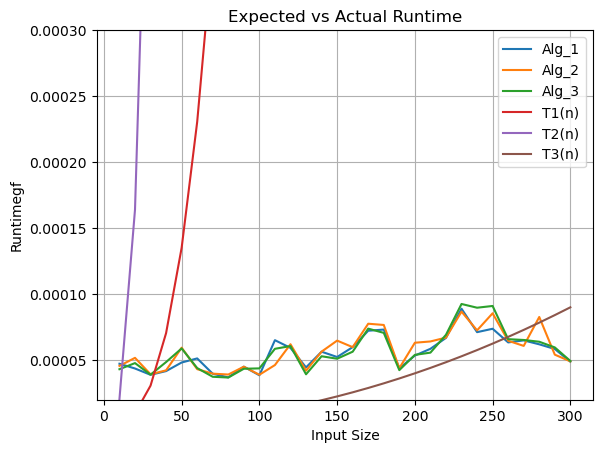

In [12]:
df1 = pd.DataFrame(table1, columns = ['Input Size','Alg_1','Alg_2','Alg_3','T1(n)','T2(n)','T3(n)'])
print(df1.to_string(index= False))   ## Source(3)
graph = df1.plot(x = 'Input Size', y = ['Alg_1','Alg_2','Alg_3','T1(n)','T2(n)','T3(n)'], title = 'Expected vs Actual Runtime', xlabel = 'Input Size', ylabel = 'Runtimegf', grid = True)
graph.set_ylim(0.00002, 0.0003)

## Experiment - II

**(3c-1)**
Objective: Generate 9 exponentially growing square matrices of size 2^i x 2^i, where 0 ≤ i ≤ 9.
Input: None
Output: 9 square matrices of size 1x1, 2x2, 4x4, ... , 512 x 512 filled with random numbers (0,1]

**(3c-2)**
Objective: Run Algorithm_1, Algorithm_3, Algorithm_4, and Algorithm_5 and record the runtimes using the system clock.
Input: 9 square matrices. 
Output: Runtimes for all four algorithms, averaged over 10 runs, and appended to a table [table2]. 

In [13]:
# table that I'll use to append data and print
table2 = []
ms = (10**6)

# (3c-1)
for n in range(9):
    sum1 = sum3 = sum4 = sum5 = 0.0 
    d = np.random.rand(2**n,2**n)
    e = np.random.rand(2**n,2**n)
    c = np.zeros((2**n,2**n))
    ## print(d.shape)                   # Verify that code outputs 10 matrices of 2^i x 2^i

    #Adjust size to value of n
    i = 2**n
    p, q = d.shape
    q1, r = e.shape
    #Scale predicted values and put into a variable
    
    row6 = T1(i) / ms
    row7 = T3(i) / ms
    row8 = T4(i) / ms
    row9 = T5(i) / ms
    

# (3c-2)
    for _ in range(1):
        
        t1 = time.perf_counter()
        algorithm_1(d,e,c,p,q,r)
        t2 = time.perf_counter()
        sum1 += (t2 - t1)
   
        t1 = time.perf_counter()
        algorithm_3(d,e,c,p,q,r)
        t2 = time.perf_counter()
        sum3 += (t2 - t1)
    
        t1 = time.perf_counter()
        algorithm_4(d,e)
        t2 = time.perf_counter()
        sum4 += (t2 - t1)

        t1 = time.perf_counter()
        algorithm_5(d,e)
        t2 = time.perf_counter()
        sum5 += (t2 - t1)

    table2.append({
        'Input Size': i, 'Alg_1': sum1, 'Alg_3': sum3, 'Alg_4': sum4, 'Alg_5' : sum5, 
        'T1(n)': row6, 'T3(n)': row7,'T4(n)': row8, 'T5(n)': row9
    })

**(3c-3)**
Objective: Generate and print a data frame, then visualize the growth rates as a function of the input size.
Input: A list, table2, which has been appended with input size and runtimes (actual and predicted).
Output: A table and a graph

 Input Size    Alg_1    Alg_3    Alg_4    Alg_5     T1(n)    T3(n)     T4(n)    T5(n)
          1 0.000010 0.000003 0.000015 0.000005  0.000008 0.000008  0.000002 0.000002
          2 0.000008 0.000007 0.000109 0.000016  0.000029 0.000011  0.000012 0.000011
          4 0.000043 0.000060 0.000013 0.000108  0.000137 0.000023  0.000080 0.000065
          8 0.000267 0.000275 0.000012 0.000263  0.000785 0.000071  0.000576 0.000408
         16 0.002034 0.002676 0.000034 0.002268  0.005153 0.000263  0.004352 0.002658
         32 0.018654 0.025294 0.000035 0.021050  0.036929 0.001031  0.033792 0.017832
         64 0.135903 0.154655 0.000053 0.118094  0.278657 0.004103  0.266240 0.121746
        128 1.194744 1.223047 0.000304 0.956656  2.162945 0.016391  2.113536 0.839928
        256 9.083929 9.035163 0.002907 5.545686 17.039873 0.065543 16.842752 5.830338


(0.0, 12.5)

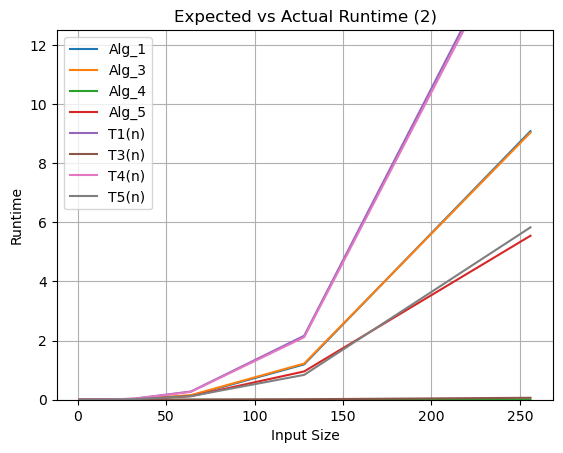

In [14]:
Input_Size = i
df2 = pd.DataFrame(table2, columns = ['Input Size','Alg_1','Alg_3','Alg_4','Alg_5','T1(n)','T3(n)','T4(n)','T5(n)'])
print(df2.to_string(index=False))           ## Source(3)
graph = df2.plot(x = 'Input Size', y = ['Alg_1','Alg_3','Alg_4','Alg_5','T1(n)','T3(n)','T4(n)','T5(n)'], title = 'Expected vs Actual Runtime (2)', xlabel = 'Input Size', ylabel = 'Runtime', grid = True)
graph.set_ylim(0, 12.5)

## Matrix-Chain Multiplication Problem ##
(Step 1)
Objective: Implement matrix-chain-order and matrix-chain-multiply. Additionall,y I made a function for the sequential multiplication, which calls algorithm_1.
Input: None
Output: matrix-chain-order returns m and s (lists of cost and ideal splits) and matrix-chain-multiply returns the result of optimal matrix multiplication.

In [15]:
def matrix_chain_order(p,n):
    m = [[0 for _ in range(n)] for _ in range(n)]     #tracks min cost
    s = [[0 for _ in range(n)] for _ in range(n)]     #tracks optimal solution
    
    for i in range(1,n):
        m[i][i] = 0

    for l in range(2,n):
        for i in range(1,n - l + 1):
            j = i + l - 1
            m[i][j] = sys.maxsize #Source(4)
            for k in range(i,j):
                q = m[i][k] + m[k+1][j] + p[i-1]*p[k]*p[j]
                if q < m[i][j]:
                    m[i][j] = q
                    s[i][j] = k
    return m,s

def chain_multiply(chain,s,i,j):
    if i == j:
        return chain[i-1]
    else: 
        k = s[i][j] #where k = split point
        A = chain_multiply(chain,s,i,k)
        B = chain_multiply(chain,s,k+1,j)
    return np.dot(A,B)

#sequential
def sequential(chain):
    output = chain[0].copy()
    for i in range(1,len(chain)):
        p = output.shape[0]
        q = output.shape[1]
        r = chain[i].shape[1]
        c = np.zeros((p,r))
        output = algorithm_1(output, chain[i], c, p,q,r)
    return output

**(Step 2)**
* Objective: Generate 19 matrix chains each with 10 numbers.
* Input: None
* Output: 19 matrix chains, stored [matrix_c]. Additionally, [dim] is a list of lists which stores the ranges of p for each chain (i.e., 10 to j*10)

In [16]:
## A is an individual matrix with random values (0,1]
## p is a list of eligible dimensions
## j is the number of the chain
## r, c are the rows and columns (composed of a value in p)
## chain is a list of the actual (10) arrays (i.e. with values (0,1])

matrix_c = []
dim = []         

for j in range(2,21):  
    p = [np.random.randint(10,j*10) for _ in range(11)]    # Prints 11 numbers which will be a 'chain' of dimensions
    chain = []                                             # To store individual chains (ie, j = 2,3,4,..20)                                      
    for i in range(10):
        r = p[i]
        c = p[i+1]
        A = np.random.rand(r,c)
        ##print(A.shape)            # [test] double check that 'chaining occurs' 
        chain.append(A)
    ##print(j,len(chain))           # [test] ensure that 20 chains containing 10 matrices were printed
    
    matrix_c.append(chain)
    dim.append(p)
##print(len(matrix_c))              # [test] 19 chains printed
##print(matrix_c[0])                # [test] print chain '0'

**(Step 3)**
* Objective: Run Algorithm_1 sequentially and Matrix-Chain-Order optimally on the previously generated chains. Time the runs and generate a data frame and plot to analyze the runtimes.
* Input: A list of list, chain, and 
* Output: A 19 x 4 data frame and line plot

In [17]:
# table that I'll use to append data and print
table3 = []

for j in range(len(matrix_c)):  #for all 19 chains
    matrix_chain_id = j + 2
    upper_bound = (j+2) * 10
    p = dim[j]
    n = len(p) - 1
    current = matrix_c[j]
    
    m,s = matrix_chain_order(p,n)
    sum1 = sum2 = 0
    
    #optimal 
    for _ in range(2):       # run 10 iterations
        t1 = time.perf_counter()
        chain_multiply(chain,s,1,n-1)
        t2 = time.perf_counter()
        sum1 += (t2 - t1)
        
    optimal_avg = sum1 / 2 

    #sequential
    for _ in range(2):
        t1 = time.perf_counter()
        sequential(current)
        t2 = time.perf_counter()   
        sum2 += (t2-t1)
    
    sequential_avg = sum2 / 2 


    table3.append({
        'Matrix Chain ID': matrix_chain_id,'Upper bound': upper_bound, 'Sequential': sequential_avg, 
        'Optimal': optimal_avg  
    })

 Matrix Chain ID  Upper bound  Sequential  Optimal
               2           20    0.017414 0.000989
               3           30    0.064006 0.000313
               4           40    0.093661 0.000569
               5           50    0.087808 0.000829
               6           60    0.176568 0.000426
               7           70    0.452812 0.000390
               8           80    0.421495 0.000510
               9           90    0.649762 0.000485
              10          100    0.834717 0.000408
              11          110    1.433735 0.000429
              12          120    0.439574 0.000266
              13          130    4.275511 0.000379
              14          140    2.713732 0.000379
              15          150    2.222276 0.000371
              16          160    1.207435 0.000350
              17          170    0.493146 0.000455
              18          180    5.629597 0.000671
              19          190    4.519602 0.000436
              20          200  

(0.0, 100.0)

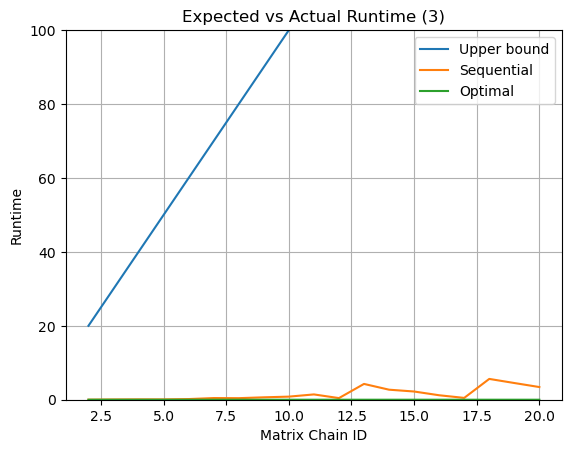

In [18]:
df3 = pd.DataFrame(table3, columns = ['Matrix Chain ID','Upper bound','Sequential','Optimal'])
print(df3.to_string(index = False)) ## Source(3)
graph = df3.plot(x = 'Matrix Chain ID', y = ['Upper bound','Sequential','Optimal'], title = 'Expected vs Actual Runtime (3)', xlabel = 'Matrix Chain ID', ylabel = 'Runtime', grid = True)
graph.set_ylim(0,100)